In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#read csv files
df_nba = pd.read_csv('nba_ref_data.csv')
df_ncaa = pd.read_csv('NCAA_Stats_86_to_19.csv')
df_combine = pd.read_excel('NCAA_Combine_Measurements.xlsx')

In [3]:
#look at size of nba dataframe
df_nba.shape

(3013, 24)

In [4]:
#size of ncaa dataframe
df_ncaa.shape

(1502, 27)

In [5]:
#size of combine dataframe
df_combine.shape

(1350, 11)

In [6]:
df_nba.head()

,Unnamed: 0,Player,Link,StartYear,EndYear,Position,Tenure,Height,Weight,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,HOF,Games,PPG,TRPG,APG,FG_pct,3_pt_pct,FT_pct,eFG_pct,PER,WS
0,0,Alaa Abdelnaby,/players/a/abdelal01.html,1991,1995,FC,4,208cm,108kg,1968-06-24,0,0,0,0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8
1,1,Mahmoud Abdul-Rauf,/players/a/abdulma02.html,1991,2001,G,10,185cm,73kg,1969-03-09,0,0,0,0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2
2,2,Tariq Abdul-Wahad,/players/a/abdulta01.html,1998,2003,F,5,198cm,101kg,1974-11-03,0,0,0,0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5
3,3,Shareef Abdur-Rahim,/players/a/abdursh01.html,1997,2008,F,11,206cm,102kg,1976-12-11,1,0,0,0,830,18.1,7.5,2.5,47.2,29.7,81.0,47.9,19.0,71.2
4,4,Álex Abrines,/players/a/abrinal01.html,2017,2019,GF,2,198cm,90kg,1993-08-01,0,0,0,0,174,5.3,1.4,0.5,38.7,36.8,88.0,52.5,8.8,5.0


In [7]:
df_ncaa.head()

,Unnamed: 0,Name,Yrs_College,School,Conf,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,0,Patrick Ewing,4,Georgetown,Big East,37,30.6,5.9,9.5,0.625,NaN,NaN,NaN,NaN,NaN,NaN,2.8,4.3,0.638,9.2,1.3,1.1,3.6,2.2,2.9,14.6,5.77
1,0,Wayman Tisdale,3,Oklahoma,Big 8,37,34.7,10.0,17.3,0.578,NaN,NaN,NaN,NaN,NaN,NaN,5.2,7.4,0.703,10.2,1.3,0.9,1.4,2.0,3.0,25.2,5.61
2,0,Benoit Benjamin,3,Creighton,MVC,32,37.3,8.1,13.8,0.582,NaN,NaN,NaN,NaN,NaN,NaN,5.4,7.3,0.738,14.1,2.1,0.8,5.1,2.8,3.1,21.5,5.36
3,0,Xavier McDaniel,4,Wichita State,MVC,31,36.9,11.3,20.3,0.559,NaN,NaN,NaN,NaN,NaN,NaN,4.6,7.2,0.634,14.8,2.2,1.5,1.0,3.2,3.3,27.2,4.33
4,0,Jon Koncak,4,SMU,SWC,33,32.8,6.6,11.2,0.592,NaN,NaN,NaN,NaN,NaN,NaN,3.9,5.8,0.667,10.7,1.3,0.4,2.8,2.5,3.5,17.2,3.32


In [8]:
df_combine.head()

,PLAYER,POS,BODY FAT %,HAND LENGTH (INCHES),HAND WIDTH (INCHES),HEIGHT W/O SHOES,HEIGHT W/ SHOES,STANDING REACH,WEIGHT (LBS),WINGSPAN,DRAFT
0,Nickeil Alexander-Walker,SG,0.059,8.5,8.75,"6' 4.25""","6' 5.5""","8' 6""",203.8,"6' 9.5""",2019
1,RJ Barrett,SF,-%,-,-,NaN,NaN,NaN,-,NaN,2019
2,Charles Bassey,C,0.085,9.25,9.5,"6' 8.75""","6' 10""","9' 1.5""",239,"7' 3.5""",2019
3,Darius Bazley,PF,0.036,9,9.75,"6' 7.75""","6' 9""","8' 11""",208.4,"7' 0""",2019
4,Bol Bol,C,0.071,9.25,9.5,"7' 0.75""","7' 2.5""","9' 7.5""",208,"7' 7""",2019


In [9]:
#Rename columns for merge
df_combine = df_combine.rename(columns={'PLAYER': 'Player'})
df_ncaa = df_ncaa.rename(columns={'Name': 'Player'})

In [10]:
#Merge df_nba and df_ncaa
df = pd.merge(df_nba, df_ncaa, on='Player', how='outer')
#df = pd.merge(df,df_combine,on='Player', how='outer')

In [11]:
df.head(25)

,Unnamed: 0_x,Player,Link,StartYear,EndYear,Position,Tenure,Height,Weight,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,HOF,Games,PPG,TRPG,APG,FG_pct,3_pt_pct,FT_pct,eFG_pct,PER,WS,Unnamed: 0_y,Yrs_College,School,Conf,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,0.0,Alaa Abdelnaby,/players/a/abdelal01.html,1991.0,1995.0,FC,4.0,208cm,108kg,1968-06-24,0.0,0.0,0.0,0,256.0,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0.0,4.0,Duke,ACC,38.0,24.9,5.7,9.2,0.620,5.7,9.2,0.620,0.0,0.0,NaN,3.6,4.7,0.775,6.6,0.7,0.7,1.3,1.4,2.6,15.1,8.81
1,1.0,Mahmoud Abdul-Rauf,/players/a/abdulma02.html,1991.0,2001.0,G,10.0,185cm,73kg,1969-03-09,0.0,0.0,0.0,0,586.0,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0.0,2.0,LSU,SEC,32.0,37.6,9.5,20.7,0.461,6.8,13.0,0.522,2.8,7.7,0.358,6.0,6.6,0.910,2.5,3.2,1.6,0.0,3.7,2.1,27.8,7.61
2,2.0,Tariq Abdul-Wahad,/players/a/abdulta01.html,1998.0,2003.0,F,5.0,198cm,101kg,1974-11-03,0.0,0.0,0.0,0,236.0,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0.0,4.0,San Jose State,WAC,26.0,33.4,8.7,17.6,0.492,7.7,14.8,0.516,1.0,2.7,0.366,5.5,7.5,0.730,8.8,1.1,1.5,0.7,2.6,2.4,23.8,4.15
3,3.0,Shareef Abdur-Rahim,/players/a/abdursh01.html,1997.0,2008.0,F,11.0,206cm,102kg,1976-12-11,1.0,0.0,0.0,0,830.0,18.1,7.5,2.5,47.2,29.7,81.0,47.9,19.0,71.2,0.0,1.0,California,Pac-10,28.0,34.7,7.4,14.2,0.518,7.1,13.5,0.525,0.3,0.8,0.381,6.1,8.9,0.683,8.4,1.0,1.9,1.3,3.1,2.1,21.1,6.44
4,4.0,Álex Abrines,/players/a/abrinal01.html,2017.0,2019.0,GF,2.0,198cm,90kg,1993-08-01,0.0,0.0,0.0,0,174.0,5.3,1.4,0.5,38.7,36.8,88.0,52.5,8.8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,Alex Acker,/players/a/ackeral01.html,2006.0,2009.0,G,3.0,196cm,83kg,1983-01-21,0.0,0.0,0.0,0,30.0,2.7,1.0,0.5,37.0,32.0,50.0,41.3,8.5,-0.2,0.0,3.0,Pepperdine,WCC,31.0,37.2,5.9,13.1,0.450,4.0,8.7,0.459,1.9,4.4,0.431,2.9,3.4,0.858,6.5,3.7,1.3,0.5,2.6,1.9,16.6,1.51
6,6.0,Mark Acres,/players/a/acresma01.html,1988.0,1993.0,FC,5.0,211cm,99kg,1962-11-15,0.0,0.0,0.0,0,375.0,3.6,4.1,0.5,50.6,53.8,66.5,50.9,9.0,9.3,0.0,4.0,Oral Roberts,MW City,29.0,33.1,7.6,13.1,0.582,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.6,0.626,9.7,1.9,1.4,1.0,2.5,3.7,18.8,3.99
7,7.0,Quincy Acy,/players/a/acyqu01.html,2013.0,2019.0,FC,6.0,201cm,108kg,1990-10-06,0.0,0.0,0.0,0,337.0,4.9,3.5,0.6,44.4,35.0,75.9,51.3,11.2,8.7,0.0,4.0,Baylor,Big 12,38.0,29.7,4.2,7.2,0.577,4.1,7.1,0.576,0.1,0.1,0.600,3.6,4.6,0.782,7.4,1.0,0.9,1.8,1.9,3.1,12.0,8.03
8,8.0,Hassan Adams,/players/a/adamsha01.html,2007.0,2009.0,G,2.0,193cm,99kg,1984-06-20,0.0,0.0,0.0,0,73.0,2.5,1.2,0.2,53.4,0.0,64.3,53.4,11.8,0.8,0.0,4.0,Arizona,Pac-10,31.0,33.3,7.5,15.8,0.478,7.0,13.7,0.511,0.5,2.1,0.262,1.9,3.1,0.611,5.0,2.9,2.6,0.5,2.2,1.9,17.5,10.09
9,9.0,Jaylen Adams,/players/a/adamsja01.html,2019.0,2019.0,G,0.0,188cm,86kg,1996-05-04,0.0,0.0,0.0,0,34.0,3.2,1.8,1.9,34.5,33.8,77.8,45.9,7.6,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(3102, 50)

In [13]:
#drop unnecessary columns
df = df.drop('Unnamed: 0_x', 1)
df = df.drop('Link', 1)
df = df.drop('Unnamed: 0_y', 1)

In [14]:
#check for null values
df.isnull().sum()

Player              0
StartYear          68
EndYear            68
Position           68
Tenure             68
Height             68
Weight             68
Birthday           68
All_Star_apps      68
All_NBA_apps       68
All_Def_apps       68
HOF                68
Games              68
PPG                68
TRPG               68
APG                68
FG_pct             68
3_pt_pct           68
FT_pct             68
eFG_pct            68
PER                78
WS                 78
Yrs_College      1571
School           1571
Conf             1571
G                1571
MP               1621
FG               1571
FGA              1571
FG%              1571
2P               1697
2PA              1700
2P%              1700
3P               1697
3PA              1700
3P%              1847
FT               1571
FTA              1571
FT%              1571
TRB              1571
AST              1574
STL              1573
BLK              1574
TOV              1637
PF               1628
PTS       

In [15]:
#drop any rows with missing values
df.dropna(inplace=True)

In [16]:
#check new shape size
df.shape

(1151, 47)

In [17]:
df.tail(50)

,Player,StartYear,EndYear,Position,Tenure,Height,Weight,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,HOF,Games,PPG,TRPG,APG,FG_pct,3_pt_pct,FT_pct,eFG_pct,PER,WS,Yrs_College,School,Conf,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
2901,Frank Williams,2003.0,2005.0,G,2.0,190cm,96kg,1980-02-25,0.0,0.0,0.0,0,86.0,2.9,0.9,1.9,35.2,30.0,83.3,39.8,9.2,0.1,3.0,Illinois,Big Ten,35.0,32.4,5.0,12.7,0.393,3.4,8.1,0.423,1.5,4.5,0.340,4.7,5.8,0.808,4.7,4.4,2.0,0.3,2.7,2.1,16.2,9.94
2903,Grant Williams,2020.0,2020.0,F,0.0,198cm,107kg,1998-11-30,0.0,0.0,0.0,0,69.0,3.4,2.6,1.0,41.2,25.0,72.2,46.9,7.9,1.6,3.0,Tennessee,SEC,37.0,31.9,6.3,11.2,0.564,5.9,10.0,0.593,0.4,1.2,0.326,5.8,7.0,0.819,7.5,3.2,1.1,1.5,2.2,3.0,18.8,10.16
2909,Jay Williams,2003.0,2003.0,G,0.0,188cm,88kg,1981-09-10,0.0,0.0,0.0,0,75.0,9.5,2.6,4.7,39.9,32.2,64.0,44.6,12.2,0.8,3.0,Duke,ACC,35.0,33.6,7.1,15.6,0.457,4.0,7.5,0.536,3.1,8.1,0.383,4.0,5.9,0.676,3.5,5.3,2.2,0.1,3.7,2.3,21.3,9.16
2910,Jayson Williams,1991.0,1999.0,FC,8.0,206cm,108kg,1968-02-22,1.0,0.0,0.0,0,475.0,7.3,7.5,0.6,44.0,12.5,60.6,44.0,15.1,20.0,3.0,St. John's (NY),Big East,13.0,29.0,5.4,10.1,0.534,5.3,9.9,0.535,0.1,0.2,0.500,3.8,6.2,0.613,7.8,0.5,0.2,0.9,2.4,3.5,14.6,7.28
2911,Jerome Williams,1997.0,2005.0,F,8.0,206cm,93kg,1973-05-10,0.0,0.0,0.0,0,587.0,6.6,6.4,0.8,50.2,3.8,64.5,50.2,15.9,37.9,2.0,Georgetown,Big East,37.0,27.5,4.0,6.8,0.588,3.9,6.6,0.601,0.0,0.2,0.143,2.3,3.6,0.639,8.8,1.4,1.9,0.4,1.9,1.8,10.3,9.83
2921,Marcus Williams,2007.0,2010.0,G,3.0,190cm,92kg,1985-12-03,0.0,0.0,0.0,0,203.0,5.6,1.8,2.8,38.6,32.1,76.7,44.3,11.0,0.0,3.0,UConn,Big East,23.0,33.3,3.6,8.9,0.407,2.6,6.3,0.410,1.0,2.6,0.400,4.1,4.7,0.862,3.9,8.6,0.9,0.2,3.7,1.7,12.3,6.57
2922,Marcus Williams,2007.0,2010.0,G,3.0,190cm,92kg,1985-12-03,0.0,0.0,0.0,0,203.0,5.6,1.8,2.8,38.6,32.1,76.7,44.3,11.0,0.0,2.0,Arizona,Pac-10,30.0,32.9,6.5,13.2,0.494,5.8,10.6,0.546,0.8,2.7,0.288,2.7,3.9,0.695,6.7,2.2,1.1,0.8,2.7,2.2,16.6,10.76
2923,Marcus Williams,2008.0,2009.0,F,1.0,201cm,92kg,1986-11-18,0.0,0.0,0.0,0,13.0,1.1,0.9,0.2,31.8,-,-,31.8,10.4,-0.1,3.0,UConn,Big East,23.0,33.3,3.6,8.9,0.407,2.6,6.3,0.410,1.0,2.6,0.400,4.1,4.7,0.862,3.9,8.6,0.9,0.2,3.7,1.7,12.3,6.57
2924,Marcus Williams,2008.0,2009.0,F,1.0,201cm,92kg,1986-11-18,0.0,0.0,0.0,0,13.0,1.1,0.9,0.2,31.8,-,-,31.8,10.4,-0.1,2.0,Arizona,Pac-10,30.0,32.9,6.5,13.2,0.494,5.8,10.6,0.546,0.8,2.7,0.288,2.7,3.9,0.695,6.7,2.2,1.1,0.8,2.7,2.2,16.6,10.76
2925,Marvin Williams,2006.0,2020.0,F,14.0,203cm,107kg,1986-06-19,0.0,0.0,0.0,0,1072.0,10.2,5.2,1.3,44.3,36.1,80.8,50.2,13.6,65.1,1.0,UNC,ACC,36.0,22.2,3.5,6.9,0.506,2.9,5.6,0.522,0.5,1.2,0.432,3.8,4.5,0.847,6.6,0.7,1.1,0.5,1.6,2.6,11.3,10.66


In [18]:
#Drop unnecessary columns and change column names to be clearer and more organized
df = df.drop('HOF', 1)
df = df.drop('eFG_pct', 1)
df = df.drop('PF', 1)
df = df.rename(columns={'Tenure': 'NBA_Tenure', 'Height': 'Ht', 'Weight': 'Wt', 'Games': 'NBA_GP',
                       'PPG': 'NBA_PPG', 'TRPG': 'NBA_RPG', 'APG': 'NBA_APG', 'FG_pct': 'NBA_FG%',
                       '3_pt_pct': 'NBA_3pt%', 'FT_pct': 'NBA_FT%', 'PER': 'NBA_PER', 'WS': 'NBA_WS',
                       'G': 'NCAA_GP', 'MP': 'NCAA_MPG', 'FG': 'NCAA_FGM', 'FGA': 'NCAA_FGA', 'FG%': 'NCAA_FG%',
                       '2P': 'NCAA_2ptM', '2PA': 'NCAA_2ptA', '3P': 'NCAA_3ptM', '3PA':'NCAA_3ptA', '3P%': 'NCAA_3pt%',
                       'FT': 'NCAA_FTM', 'FTA': 'NCAA_FTA', 'FT%': 'NCAA_FT%', 'TRB': 'NCAA_RPG', 'AST': 'NCAA_APG',
                       'STL': 'NCAA_SPG', 'BLK': 'NCAA_BPG', 'TOV': 'NCAA_TOPG', 'PTS': 'NCAA_PPG', 'SOS': 'NCAA_SOS'})

In [19]:
df.head()

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS
1,Mahmoud Abdul-Rauf,1991.0,2001.0,G,10.0,185cm,73kg,1969-03-09,0.0,0.0,0.0,586.0,14.6,1.9,3.5,44.2,35.4,90.5,15.4,25.2,2.0,LSU,SEC,32.0,37.6,9.5,20.7,0.461,6.8,13.0,0.522,2.8,7.7,0.358,6.0,6.6,0.910,2.5,3.2,1.6,0.0,3.7,27.8,7.61
2,Tariq Abdul-Wahad,1998.0,2003.0,F,5.0,198cm,101kg,1974-11-03,0.0,0.0,0.0,236.0,7.8,3.3,1.1,41.7,23.7,70.3,11.4,3.5,4.0,San Jose State,WAC,26.0,33.4,8.7,17.6,0.492,7.7,14.8,0.516,1.0,2.7,0.366,5.5,7.5,0.730,8.8,1.1,1.5,0.7,2.6,23.8,4.15
3,Shareef Abdur-Rahim,1997.0,2008.0,F,11.0,206cm,102kg,1976-12-11,1.0,0.0,0.0,830.0,18.1,7.5,2.5,47.2,29.7,81.0,19.0,71.2,1.0,California,Pac-10,28.0,34.7,7.4,14.2,0.518,7.1,13.5,0.525,0.3,0.8,0.381,6.1,8.9,0.683,8.4,1.0,1.9,1.3,3.1,21.1,6.44
5,Alex Acker,2006.0,2009.0,G,3.0,196cm,83kg,1983-01-21,0.0,0.0,0.0,30.0,2.7,1.0,0.5,37.0,32.0,50.0,8.5,-0.2,3.0,Pepperdine,WCC,31.0,37.2,5.9,13.1,0.450,4.0,8.7,0.459,1.9,4.4,0.431,2.9,3.4,0.858,6.5,3.7,1.3,0.5,2.6,16.6,1.51
7,Quincy Acy,2013.0,2019.0,FC,6.0,201cm,108kg,1990-10-06,0.0,0.0,0.0,337.0,4.9,3.5,0.6,44.4,35.0,75.9,11.2,8.7,4.0,Baylor,Big 12,38.0,29.7,4.2,7.2,0.577,4.1,7.1,0.576,0.1,0.1,0.600,3.6,4.6,0.782,7.4,1.0,0.9,1.8,1.9,12.0,8.03


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 1 to 3025
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         1151 non-null   object 
 1   StartYear      1151 non-null   float64
 2   EndYear        1151 non-null   float64
 3   Position       1151 non-null   object 
 4   NBA_Tenure     1151 non-null   float64
 5   Ht             1151 non-null   object 
 6   Wt             1151 non-null   object 
 7   Birthday       1151 non-null   object 
 8   All_Star_apps  1151 non-null   float64
 9   All_NBA_apps   1151 non-null   float64
 10  All_Def_apps   1151 non-null   float64
 11  NBA_GP         1151 non-null   float64
 12  NBA_PPG        1151 non-null   float64
 13  NBA_RPG        1151 non-null   float64
 14  NBA_APG        1151 non-null   float64
 15  NBA_FG%        1151 non-null   object 
 16  NBA_3pt%       1151 non-null   object 
 17  NBA_FT%        1151 non-null   object 
 18  NBA_PER 

In [21]:
#ran into error when trying to convert NBA_FG%, NBA_3pt%, NBA_FT% and NBA_PER columns to float. Checking '-' to determine issue
df.loc[df['NBA_FG%'] == '-']

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS
602,JamesOn Curry,2010.0,2010.0,G,0.0,190cm,86kg,1986-01-07,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-,-,-,-,0.0,3.0,Oklahoma State,Big 12,35.0,37.0,5.8,12.8,0.452,3.3,6.7,0.489,2.5,6.1,0.411,3.3,4.1,0.793,3.2,3.7,1.2,0.3,3.1,17.3,6.34
1497,George King,2019.0,2019.0,GF,0.0,198cm,102kg,1994-01-15,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-,-,-,1.9,0.0,4.0,Colorado,Pac-12,32.0,28.5,4.4,10.0,0.445,2.5,5.1,0.494,1.9,4.9,0.395,2.1,2.7,0.782,7.8,1.1,0.5,0.7,2.0,12.9,7.00
1573,Gani Lawal,2011.0,2011.0,F,0.0,206cm,106kg,1988-11-07,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-,-,-,-9.1,0.0,3.0,Georgia Tech,ACC,36.0,25.8,4.8,9.0,0.529,4.8,9.0,0.531,0.0,0.0,0.000,3.5,6.2,0.572,8.5,0.4,0.4,1.4,2.2,13.1,9.02
1771,Michael McDonald,1998.0,1998.0,C,0.0,208cm,105kg,1969-02-13,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-,-,-,-22.1,-0.1,3.0,New Orleans,Sun Belt,29.0,27.2,4.5,7.8,0.573,4.5,7.8,0.575,0.0,0.0,0.000,2.1,3.7,0.585,9.7,0.8,0.9,2.8,2.5,11.1,-2.49
2469,Chris Smith,2014.0,2014.0,G,0.0,188cm,90kg,1987-10-13,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-,-,-,0.0,0.0,4.0,UConn,Big East,30.0,36.3,6.7,16.2,0.415,4.0,9.8,0.412,2.7,6.4,0.420,5.1,6.3,0.800,3.3,3.7,1.2,0.5,2.8,21.2,7.09


In [22]:
df['NBA_FG%'] = pd.to_numeric(df['NBA_FG%'], errors='coerce')
df['NBA_3pt%'] = pd.to_numeric(df['NBA_3pt%'], errors='coerce')
df['NBA_FT%'] = pd.to_numeric(df['NBA_FT%'], errors='coerce')
df['NBA_PER'] = pd.to_numeric(df['NBA_PER'], errors='coerce')
#replace '-' in columns with 0 
#df['NBA_FG%'] = df['NBA_FG%'].replace('-', 0,inplace=True)
#df['NBA_3pt%'] = df['NBA_3pt%'].replace('-',0,inplace=True)
#df['NBA_FT%'] = df['NBA_FT%'].replace('-',0,inplace=True)
#df['NBA_PER'] = df['NBA_PER'].replace('-',0,inplace=True)

In [23]:
df.head()

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS
1,Mahmoud Abdul-Rauf,1991.0,2001.0,G,10.0,185cm,73kg,1969-03-09,0.0,0.0,0.0,586.0,14.6,1.9,3.5,44.2,35.4,90.5,15.4,25.2,2.0,LSU,SEC,32.0,37.6,9.5,20.7,0.461,6.8,13.0,0.522,2.8,7.7,0.358,6.0,6.6,0.910,2.5,3.2,1.6,0.0,3.7,27.8,7.61
2,Tariq Abdul-Wahad,1998.0,2003.0,F,5.0,198cm,101kg,1974-11-03,0.0,0.0,0.0,236.0,7.8,3.3,1.1,41.7,23.7,70.3,11.4,3.5,4.0,San Jose State,WAC,26.0,33.4,8.7,17.6,0.492,7.7,14.8,0.516,1.0,2.7,0.366,5.5,7.5,0.730,8.8,1.1,1.5,0.7,2.6,23.8,4.15
3,Shareef Abdur-Rahim,1997.0,2008.0,F,11.0,206cm,102kg,1976-12-11,1.0,0.0,0.0,830.0,18.1,7.5,2.5,47.2,29.7,81.0,19.0,71.2,1.0,California,Pac-10,28.0,34.7,7.4,14.2,0.518,7.1,13.5,0.525,0.3,0.8,0.381,6.1,8.9,0.683,8.4,1.0,1.9,1.3,3.1,21.1,6.44
5,Alex Acker,2006.0,2009.0,G,3.0,196cm,83kg,1983-01-21,0.0,0.0,0.0,30.0,2.7,1.0,0.5,37.0,32.0,50.0,8.5,-0.2,3.0,Pepperdine,WCC,31.0,37.2,5.9,13.1,0.450,4.0,8.7,0.459,1.9,4.4,0.431,2.9,3.4,0.858,6.5,3.7,1.3,0.5,2.6,16.6,1.51
7,Quincy Acy,2013.0,2019.0,FC,6.0,201cm,108kg,1990-10-06,0.0,0.0,0.0,337.0,4.9,3.5,0.6,44.4,35.0,75.9,11.2,8.7,4.0,Baylor,Big 12,38.0,29.7,4.2,7.2,0.577,4.1,7.1,0.576,0.1,0.1,0.600,3.6,4.6,0.782,7.4,1.0,0.9,1.8,1.9,12.0,8.03


In [24]:
df.isnull().sum()

Player            0
StartYear         0
EndYear           0
Position          0
NBA_Tenure        0
Ht                0
Wt                0
Birthday          0
All_Star_apps     0
All_NBA_apps      0
All_Def_apps      0
NBA_GP            0
NBA_PPG           0
NBA_RPG           0
NBA_APG           0
NBA_FG%           5
NBA_3pt%         54
NBA_FT%          27
NBA_PER           1
NBA_WS            0
Yrs_College       0
School            0
Conf              0
NCAA_GP           0
NCAA_MPG          0
NCAA_FGM          0
NCAA_FGA          0
NCAA_FG%          0
NCAA_2ptM         0
NCAA_2ptA         0
2P%               0
NCAA_3ptM         0
NCAA_3ptA         0
NCAA_3pt%         0
NCAA_FTM          0
NCAA_FTA          0
NCAA_FT%          0
NCAA_RPG          0
NCAA_APG          0
NCAA_SPG          0
NCAA_BPG          0
NCAA_TOPG         0
NCAA_PPG          0
NCAA_SOS          0
dtype: int64

In [25]:
df['NBA_FG%'] = df['NBA_FG%'].fillna(0)
df['NBA_3pt%'] = df['NBA_3pt%'].fillna(0)
df['NBA_FT%'] = df['NBA_FT%'].fillna(0)
df['NBA_PER'] = df['NBA_PER'].fillna(0)

In [26]:
df.head()

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS
1,Mahmoud Abdul-Rauf,1991.0,2001.0,G,10.0,185cm,73kg,1969-03-09,0.0,0.0,0.0,586.0,14.6,1.9,3.5,44.2,35.4,90.5,15.4,25.2,2.0,LSU,SEC,32.0,37.6,9.5,20.7,0.461,6.8,13.0,0.522,2.8,7.7,0.358,6.0,6.6,0.910,2.5,3.2,1.6,0.0,3.7,27.8,7.61
2,Tariq Abdul-Wahad,1998.0,2003.0,F,5.0,198cm,101kg,1974-11-03,0.0,0.0,0.0,236.0,7.8,3.3,1.1,41.7,23.7,70.3,11.4,3.5,4.0,San Jose State,WAC,26.0,33.4,8.7,17.6,0.492,7.7,14.8,0.516,1.0,2.7,0.366,5.5,7.5,0.730,8.8,1.1,1.5,0.7,2.6,23.8,4.15
3,Shareef Abdur-Rahim,1997.0,2008.0,F,11.0,206cm,102kg,1976-12-11,1.0,0.0,0.0,830.0,18.1,7.5,2.5,47.2,29.7,81.0,19.0,71.2,1.0,California,Pac-10,28.0,34.7,7.4,14.2,0.518,7.1,13.5,0.525,0.3,0.8,0.381,6.1,8.9,0.683,8.4,1.0,1.9,1.3,3.1,21.1,6.44
5,Alex Acker,2006.0,2009.0,G,3.0,196cm,83kg,1983-01-21,0.0,0.0,0.0,30.0,2.7,1.0,0.5,37.0,32.0,50.0,8.5,-0.2,3.0,Pepperdine,WCC,31.0,37.2,5.9,13.1,0.450,4.0,8.7,0.459,1.9,4.4,0.431,2.9,3.4,0.858,6.5,3.7,1.3,0.5,2.6,16.6,1.51
7,Quincy Acy,2013.0,2019.0,FC,6.0,201cm,108kg,1990-10-06,0.0,0.0,0.0,337.0,4.9,3.5,0.6,44.4,35.0,75.9,11.2,8.7,4.0,Baylor,Big 12,38.0,29.7,4.2,7.2,0.577,4.1,7.1,0.576,0.1,0.1,0.600,3.6,4.6,0.782,7.4,1.0,0.9,1.8,1.9,12.0,8.03


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 1 to 3025
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         1151 non-null   object 
 1   StartYear      1151 non-null   float64
 2   EndYear        1151 non-null   float64
 3   Position       1151 non-null   object 
 4   NBA_Tenure     1151 non-null   float64
 5   Ht             1151 non-null   object 
 6   Wt             1151 non-null   object 
 7   Birthday       1151 non-null   object 
 8   All_Star_apps  1151 non-null   float64
 9   All_NBA_apps   1151 non-null   float64
 10  All_Def_apps   1151 non-null   float64
 11  NBA_GP         1151 non-null   float64
 12  NBA_PPG        1151 non-null   float64
 13  NBA_RPG        1151 non-null   float64
 14  NBA_APG        1151 non-null   float64
 15  NBA_FG%        1151 non-null   float64
 16  NBA_3pt%       1151 non-null   float64
 17  NBA_FT%        1151 non-null   float64
 18  NBA_PER 

In [28]:
df.shape

(1151, 44)

In [29]:
df['NBA_Tenure'] = df['NBA_Tenure'] + 1

In [30]:
#remove any player who joined the league in 2018 or later because they haven't reached their full potential yet
#save 2019 draft class to seperate dataframe to test model on later
df_2019_rookies = df[(df['StartYear'] == 2019.00)]
df = df[~(df['StartYear'] >= 2018.00)]  

In [31]:
df.head()

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS
1,Mahmoud Abdul-Rauf,1991.0,2001.0,G,11.0,185cm,73kg,1969-03-09,0.0,0.0,0.0,586.0,14.6,1.9,3.5,44.2,35.4,90.5,15.4,25.2,2.0,LSU,SEC,32.0,37.6,9.5,20.7,0.461,6.8,13.0,0.522,2.8,7.7,0.358,6.0,6.6,0.910,2.5,3.2,1.6,0.0,3.7,27.8,7.61
2,Tariq Abdul-Wahad,1998.0,2003.0,F,6.0,198cm,101kg,1974-11-03,0.0,0.0,0.0,236.0,7.8,3.3,1.1,41.7,23.7,70.3,11.4,3.5,4.0,San Jose State,WAC,26.0,33.4,8.7,17.6,0.492,7.7,14.8,0.516,1.0,2.7,0.366,5.5,7.5,0.730,8.8,1.1,1.5,0.7,2.6,23.8,4.15
3,Shareef Abdur-Rahim,1997.0,2008.0,F,12.0,206cm,102kg,1976-12-11,1.0,0.0,0.0,830.0,18.1,7.5,2.5,47.2,29.7,81.0,19.0,71.2,1.0,California,Pac-10,28.0,34.7,7.4,14.2,0.518,7.1,13.5,0.525,0.3,0.8,0.381,6.1,8.9,0.683,8.4,1.0,1.9,1.3,3.1,21.1,6.44
5,Alex Acker,2006.0,2009.0,G,4.0,196cm,83kg,1983-01-21,0.0,0.0,0.0,30.0,2.7,1.0,0.5,37.0,32.0,50.0,8.5,-0.2,3.0,Pepperdine,WCC,31.0,37.2,5.9,13.1,0.450,4.0,8.7,0.459,1.9,4.4,0.431,2.9,3.4,0.858,6.5,3.7,1.3,0.5,2.6,16.6,1.51
7,Quincy Acy,2013.0,2019.0,FC,7.0,201cm,108kg,1990-10-06,0.0,0.0,0.0,337.0,4.9,3.5,0.6,44.4,35.0,75.9,11.2,8.7,4.0,Baylor,Big 12,38.0,29.7,4.2,7.2,0.577,4.1,7.1,0.576,0.1,0.1,0.600,3.6,4.6,0.782,7.4,1.0,0.9,1.8,1.9,12.0,8.03


In [32]:
df.shape

(1013, 44)

# Feature Engineering and EDA

In [33]:
pd.options.display.float_format = "{:,.2f}".format

In [34]:
df = df.sort_values(by=['NBA_Tenure'], ascending=False)

In [35]:
df.head(50)

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS
574,Jamal Crawford,"2,001.00","2,020.00",G,20.00,196cm,83kg,1980-03-20,0.00,0.00,0.00,"1,327.00",14.60,2.20,3.40,41.00,34.80,86.20,15.10,60.70,1.00,Michigan,Big Ten,17.00,33.90,6.20,15.00,0.41,4.20,9.10,0.47,1.90,5.90,0.33,2.40,3.00,0.78,2.80,4.50,1.10,0.90,3.10,16.60,9.27
1484,Jason Kidd,"1,995.00","2,013.00",G,19.00,193cm,92kg,1973-03-23,10.00,6.00,9.00,"1,391.00",12.60,6.30,8.70,40.00,34.90,78.50,17.90,138.60,2.00,California,Pac-10,30.00,35.10,5.50,11.70,0.47,3.80,7.00,0.55,1.70,4.70,0.36,3.90,5.60,0.69,6.90,9.10,3.10,0.30,4.30,16.70,7.14
1239,Juwan Howard,"1,995.00","2,013.00",F,19.00,206cm,108kg,1973-02-07,1.00,0.00,0.00,"1,208.00",13.40,6.10,2.20,46.90,12.00,76.40,14.60,59.40,3.00,Michigan,Big Ten,30.00,34.00,8.70,15.60,0.56,8.70,15.40,0.56,0.00,0.20,0.14,3.40,5.00,0.68,8.90,2.40,1.50,0.70,2.60,20.80,12.04
1190,Grant Hill,"1,995.00","2,013.00",FG,19.00,203cm,102kg,1972-10-05,7.00,5.00,0.00,"1,026.00",16.70,6.00,4.10,48.30,31.40,76.90,19.00,99.90,4.00,Duke,ACC,34.00,35.70,6.40,13.90,0.46,5.30,10.90,0.48,1.10,2.90,0.39,3.40,4.90,0.70,6.90,5.20,1.90,1.20,3.00,17.40,8.92
2125,Paul Pierce,"1,999.00","2,017.00",FG,19.00,201cm,106kg,1977-10-13,10.00,4.00,0.00,"1,343.00",19.70,5.60,3.50,44.50,36.80,80.60,19.70,150.00,3.00,Kansas,Big 12,38.00,30.40,7.60,14.70,0.51,6.50,11.60,0.56,1.10,3.10,0.34,4.30,5.80,0.74,6.70,2.60,1.10,1.10,2.90,20.40,6.54
738,Tim Duncan,"1,998.00","2,016.00",FC,19.00,211cm,113kg,1976-04-25,15.00,15.00,15.00,"1,392.00",19.00,10.80,3.00,50.60,17.90,69.60,24.20,206.40,4.00,Wake Forest,ACC,31.00,36.70,7.50,12.40,0.61,7.40,11.70,0.63,0.20,0.70,0.27,5.50,8.70,0.64,14.70,3.20,0.70,3.30,3.20,20.80,10.53
2619,Jason Terry,"2,000.00","2,018.00",G,19.00,188cm,83kg,1977-09-15,0.00,0.00,0.00,"1,410.00",13.40,2.30,3.80,44.40,38.00,84.50,16.20,102.00,4.00,Arizona,Pac-10,29.00,38.20,7.20,16.30,0.44,4.60,9.70,0.47,2.60,6.60,0.40,4.90,5.80,0.84,3.30,5.50,2.80,0.20,4.10,21.90,8.31
1948,Steve Nash,"1,997.00","2,014.00",G,18.00,190cm,88kg,1974-02-07,8.00,7.00,0.00,"1,217.00",14.30,3.00,8.50,49.00,42.80,90.40,20.00,129.70,4.00,Santa Clara,WCC,29.00,33.80,5.70,13.10,0.43,3.50,6.80,0.51,2.20,6.30,0.34,3.50,3.90,0.89,3.60,6.00,1.30,0.00,3.60,17.00,4.09
1837,Reggie Miller,"1,988.00","2,005.00",GF,18.00,201cm,83kg,1965-08-24,5.00,3.00,0.00,"1,389.00",18.20,3.00,3.00,47.10,39.50,88.80,18.40,174.40,4.00,UCLA,Pac-10,32.00,36.40,7.70,14.20,0.54,5.60,9.30,0.60,2.20,4.90,0.44,4.70,5.60,0.83,5.40,2.20,2.00,0.20,1.90,22.30,6.89
848,Derek Fisher,"1,997.00","2,014.00",G,18.00,185cm,90kg,1974-08-09,0.00,0.00,0.00,"1,287.00",8.30,2.10,3.00,39.90,37.40,81.70,11.70,62.30,4.00,Little Rock,Sun Belt,30.00,36.00,4.30,10.40,0.41,2.60,6.10,0.43,1.70,4.30,0.39,4.20,5.60,0.75,5.20,5.10,1.90,0.10,2.70,14.50,-1.03


In [36]:
df['NBA_PER'].groupby(df['All_Star_apps']).mean()

All_Star_apps
0.00    11.48
1.00    16.37
2.00    17.63
3.00    17.91
4.00    18.42
5.00    19.43
6.00    20.55
7.00    22.53
8.00    22.40
9.00    21.20
10.00   22.12
11.00   20.90
15.00   24.20
Name: NBA_PER, dtype: float64

In [37]:
df['NBA_PER'].groupby(df['All_Star_apps']).describe()

,count,mean,std,min,25%,50%,75%,max
All_Star_apps,,,,,,,,
0.00,889.00,11.48,4.56,-22.10,9.70,11.90,13.80,66.80
1.00,44.00,16.37,1.55,13.60,15.17,16.35,17.12,19.60
2.00,23.00,17.63,2.51,13.90,16.15,17.50,18.90,25.10
3.00,14.00,17.91,2.80,13.80,16.20,17.45,19.50,24.80
4.00,11.00,18.42,2.52,15.10,16.65,18.20,19.15,23.10
5.00,11.00,19.43,1.64,16.40,18.60,18.80,20.60,22.00
6.00,6.00,20.55,2.46,17.60,18.62,20.65,22.15,23.80
7.00,3.00,22.53,4.36,19.00,20.10,21.20,24.30,27.40
8.00,2.00,22.40,3.39,20.00,21.20,22.40,23.60,24.80


In [38]:
#How to classify 'All-Star' category
df.loc[(df['All_Star_apps'] >= 2)].shape
#df.loc[(df['NBA_PER'] >= 15)].shape
#df.loc[((df['All_Star_apps'] >= 1) & (df['NBA_PER'] >= 15))].shape

(80, 44)

In [39]:
#How to classify 'Starter' category
df.loc[(df['All_Star_apps'] <= 1) & (df['NBA_PER'] >= 13.8) & (df['NBA_Tenure'] > 2)].shape

(254, 44)

In [40]:
#How to classify 'Role Player' category
df.loc[(df['All_Star_apps'] <= 1) & (df['NBA_PER'] > 9.7) & (df['NBA_PER'] < 13.8) & (df['NBA_Tenure'] > 2)].shape

(375, 44)

In [41]:
#How to classify 'Bust' category pt. 1
df.loc[(df['All_Star_apps'] == 0) & (df['NBA_PER'] <= 9.7) & (df['NBA_Tenure'] > 2)].shape

(113, 44)

In [42]:
#How to classify 'Bust' category pt. 2
df.loc[(df['All_Star_apps'] == 0) & (df['NBA_Tenure'] <= 2)].shape

(191, 44)

In [43]:
124+211+374+113+191

1013

In [44]:
#Create the target variable 'tier'
# create a list of our conditions
conditions = [
    (df['All_Star_apps'] >= 2),
    (df['All_Star_apps'] <= 1) & (df['NBA_PER'] >= 13.8) & (df['NBA_Tenure'] > 2),
    (df['All_Star_apps'] <= 1) & (df['NBA_PER'] > 9.7) & (df['NBA_PER'] < 13.8) & (df['NBA_Tenure'] > 2),
    (df['All_Star_apps'] == 0) & (df['NBA_PER'] <= 9.7) & (df['NBA_Tenure'] > 2),
    (df['All_Star_apps'] == 0) & (df['NBA_Tenure'] <= 2)
    ]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head(25)

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier
574,Jamal Crawford,"2,001.00","2,020.00",G,20.00,196cm,83kg,1980-03-20,0.00,0.00,0.00,"1,327.00",14.60,2.20,3.40,41.00,34.80,86.20,15.10,60.70,1.00,Michigan,Big Ten,17.00,33.90,6.20,15.00,0.41,4.20,9.10,0.47,1.90,5.90,0.33,2.40,3.00,0.78,2.80,4.50,1.10,0.90,3.10,16.60,9.27,2
1484,Jason Kidd,"1,995.00","2,013.00",G,19.00,193cm,92kg,1973-03-23,10.00,6.00,9.00,"1,391.00",12.60,6.30,8.70,40.00,34.90,78.50,17.90,138.60,2.00,California,Pac-10,30.00,35.10,5.50,11.70,0.47,3.80,7.00,0.55,1.70,4.70,0.36,3.90,5.60,0.69,6.90,9.10,3.10,0.30,4.30,16.70,7.14,3
1239,Juwan Howard,"1,995.00","2,013.00",F,19.00,206cm,108kg,1973-02-07,1.00,0.00,0.00,"1,208.00",13.40,6.10,2.20,46.90,12.00,76.40,14.60,59.40,3.00,Michigan,Big Ten,30.00,34.00,8.70,15.60,0.56,8.70,15.40,0.56,0.00,0.20,0.14,3.40,5.00,0.68,8.90,2.40,1.50,0.70,2.60,20.80,12.04,2
1190,Grant Hill,"1,995.00","2,013.00",FG,19.00,203cm,102kg,1972-10-05,7.00,5.00,0.00,"1,026.00",16.70,6.00,4.10,48.30,31.40,76.90,19.00,99.90,4.00,Duke,ACC,34.00,35.70,6.40,13.90,0.46,5.30,10.90,0.48,1.10,2.90,0.39,3.40,4.90,0.70,6.90,5.20,1.90,1.20,3.00,17.40,8.92,3
2125,Paul Pierce,"1,999.00","2,017.00",FG,19.00,201cm,106kg,1977-10-13,10.00,4.00,0.00,"1,343.00",19.70,5.60,3.50,44.50,36.80,80.60,19.70,150.00,3.00,Kansas,Big 12,38.00,30.40,7.60,14.70,0.51,6.50,11.60,0.56,1.10,3.10,0.34,4.30,5.80,0.74,6.70,2.60,1.10,1.10,2.90,20.40,6.54,3
738,Tim Duncan,"1,998.00","2,016.00",FC,19.00,211cm,113kg,1976-04-25,15.00,15.00,15.00,"1,392.00",19.00,10.80,3.00,50.60,17.90,69.60,24.20,206.40,4.00,Wake Forest,ACC,31.00,36.70,7.50,12.40,0.61,7.40,11.70,0.63,0.20,0.70,0.27,5.50,8.70,0.64,14.70,3.20,0.70,3.30,3.20,20.80,10.53,3
2619,Jason Terry,"2,000.00","2,018.00",G,19.00,188cm,83kg,1977-09-15,0.00,0.00,0.00,"1,410.00",13.40,2.30,3.80,44.40,38.00,84.50,16.20,102.00,4.00,Arizona,Pac-10,29.00,38.20,7.20,16.30,0.44,4.60,9.70,0.47,2.60,6.60,0.40,4.90,5.80,0.84,3.30,5.50,2.80,0.20,4.10,21.90,8.31,2
1948,Steve Nash,"1,997.00","2,014.00",G,18.00,190cm,88kg,1974-02-07,8.00,7.00,0.00,"1,217.00",14.30,3.00,8.50,49.00,42.80,90.40,20.00,129.70,4.00,Santa Clara,WCC,29.00,33.80,5.70,13.10,0.43,3.50,6.80,0.51,2.20,6.30,0.34,3.50,3.90,0.89,3.60,6.00,1.30,0.00,3.60,17.00,4.09,3
1837,Reggie Miller,"1,988.00","2,005.00",GF,18.00,201cm,83kg,1965-08-24,5.00,3.00,0.00,"1,389.00",18.20,3.00,3.00,47.10,39.50,88.80,18.40,174.40,4.00,UCLA,Pac-10,32.00,36.40,7.70,14.20,0.54,5.60,9.30,0.60,2.20,4.90,0.44,4.70,5.60,0.83,5.40,2.20,2.00,0.20,1.90,22.30,6.89,3
848,Derek Fisher,"1,997.00","2,014.00",G,18.00,185cm,90kg,1974-08-09,0.00,0.00,0.00,"1,287.00",8.30,2.10,3.00,39.90,37.40,81.70,11.70,62.30,4.00,Little Rock,Sun Belt,30.00,36.00,4.30,10.40,0.41,2.60,6.10,0.43,1.70,4.30,0.39,4.20,5.60,0.75,5.20,5.10,1.90,0.10,2.70,14.50,-1.03,1


In [45]:
df['Tier'].value_counts()

1    375
0    304
2    254
3     80
Name: Tier, dtype: int64

In [46]:
#remove 'cm' and 'kg' from Ht and Wt columns. Convert ht and wt to inches and lbs respectively
df['Ht'] = df['Ht'].map(lambda x: x.rstrip('cm'))
df['Wt'] = df['Wt'].map(lambda x: x.rstrip('kg'))
df['Ht'] = df['Ht'].astype(int)
df['Wt'] = df['Wt'].astype(float)
df['Ht'] = df['Ht'] * 0.393701
df['Wt'] = df['Wt'] * 2.20462

In [47]:
df.head(25)

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier
574,Jamal Crawford,"2,001.00","2,020.00",G,20.00,77.17,182.98,1980-03-20,0.00,0.00,0.00,"1,327.00",14.60,2.20,3.40,41.00,34.80,86.20,15.10,60.70,1.00,Michigan,Big Ten,17.00,33.90,6.20,15.00,0.41,4.20,9.10,0.47,1.90,5.90,0.33,2.40,3.00,0.78,2.80,4.50,1.10,0.90,3.10,16.60,9.27,2
1484,Jason Kidd,"1,995.00","2,013.00",G,19.00,75.98,202.83,1973-03-23,10.00,6.00,9.00,"1,391.00",12.60,6.30,8.70,40.00,34.90,78.50,17.90,138.60,2.00,California,Pac-10,30.00,35.10,5.50,11.70,0.47,3.80,7.00,0.55,1.70,4.70,0.36,3.90,5.60,0.69,6.90,9.10,3.10,0.30,4.30,16.70,7.14,3
1239,Juwan Howard,"1,995.00","2,013.00",F,19.00,81.10,238.10,1973-02-07,1.00,0.00,0.00,"1,208.00",13.40,6.10,2.20,46.90,12.00,76.40,14.60,59.40,3.00,Michigan,Big Ten,30.00,34.00,8.70,15.60,0.56,8.70,15.40,0.56,0.00,0.20,0.14,3.40,5.00,0.68,8.90,2.40,1.50,0.70,2.60,20.80,12.04,2
1190,Grant Hill,"1,995.00","2,013.00",FG,19.00,79.92,224.87,1972-10-05,7.00,5.00,0.00,"1,026.00",16.70,6.00,4.10,48.30,31.40,76.90,19.00,99.90,4.00,Duke,ACC,34.00,35.70,6.40,13.90,0.46,5.30,10.90,0.48,1.10,2.90,0.39,3.40,4.90,0.70,6.90,5.20,1.90,1.20,3.00,17.40,8.92,3
2125,Paul Pierce,"1,999.00","2,017.00",FG,19.00,79.13,233.69,1977-10-13,10.00,4.00,0.00,"1,343.00",19.70,5.60,3.50,44.50,36.80,80.60,19.70,150.00,3.00,Kansas,Big 12,38.00,30.40,7.60,14.70,0.51,6.50,11.60,0.56,1.10,3.10,0.34,4.30,5.80,0.74,6.70,2.60,1.10,1.10,2.90,20.40,6.54,3
738,Tim Duncan,"1,998.00","2,016.00",FC,19.00,83.07,249.12,1976-04-25,15.00,15.00,15.00,"1,392.00",19.00,10.80,3.00,50.60,17.90,69.60,24.20,206.40,4.00,Wake Forest,ACC,31.00,36.70,7.50,12.40,0.61,7.40,11.70,0.63,0.20,0.70,0.27,5.50,8.70,0.64,14.70,3.20,0.70,3.30,3.20,20.80,10.53,3
2619,Jason Terry,"2,000.00","2,018.00",G,19.00,74.02,182.98,1977-09-15,0.00,0.00,0.00,"1,410.00",13.40,2.30,3.80,44.40,38.00,84.50,16.20,102.00,4.00,Arizona,Pac-10,29.00,38.20,7.20,16.30,0.44,4.60,9.70,0.47,2.60,6.60,0.40,4.90,5.80,0.84,3.30,5.50,2.80,0.20,4.10,21.90,8.31,2
1948,Steve Nash,"1,997.00","2,014.00",G,18.00,74.80,194.01,1974-02-07,8.00,7.00,0.00,"1,217.00",14.30,3.00,8.50,49.00,42.80,90.40,20.00,129.70,4.00,Santa Clara,WCC,29.00,33.80,5.70,13.10,0.43,3.50,6.80,0.51,2.20,6.30,0.34,3.50,3.90,0.89,3.60,6.00,1.30,0.00,3.60,17.00,4.09,3
1837,Reggie Miller,"1,988.00","2,005.00",GF,18.00,79.13,182.98,1965-08-24,5.00,3.00,0.00,"1,389.00",18.20,3.00,3.00,47.10,39.50,88.80,18.40,174.40,4.00,UCLA,Pac-10,32.00,36.40,7.70,14.20,0.54,5.60,9.30,0.60,2.20,4.90,0.44,4.70,5.60,0.83,5.40,2.20,2.00,0.20,1.90,22.30,6.89,3
848,Derek Fisher,"1,997.00","2,014.00",G,18.00,72.83,198.42,1974-08-09,0.00,0.00,0.00,"1,287.00",8.30,2.10,3.00,39.90,37.40,81.70,11.70,62.30,4.00,Little Rock,Sun Belt,30.00,36.00,4.30,10.40,0.41,2.60,6.10,0.43,1.70,4.30,0.39,4.20,5.60,0.75,5.20,5.10,1.90,0.10,2.70,14.50,-1.03,1


In [48]:
df.corr()

,StartYear,EndYear,NBA_Tenure,Ht,Wt,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier
StartYear,1.00,0.88,-0.26,0.02,0.16,-0.04,-0.03,-0.03,-0.20,-0.00,0.01,-0.07,-0.07,0.16,-0.01,-0.04,-0.15,-0.36,0.29,-0.17,-0.33,-0.26,-0.17,-0.35,-0.35,-0.08,0.05,0.08,0.04,-0.12,-0.13,-0.00,-0.07,-0.07,-0.19,-0.00,-0.22,-0.26,0.03,-0.05
EndYear,0.88,1.00,0.23,0.03,0.16,0.14,0.10,0.08,0.26,0.31,0.28,0.17,0.10,0.30,0.15,0.20,0.23,-0.41,0.31,-0.14,-0.26,-0.22,-0.11,-0.28,-0.30,-0.02,0.05,0.08,0.07,-0.08,-0.09,0.00,-0.02,-0.03,-0.10,0.05,-0.18,-0.20,0.08,0.29
NBA_Tenure,-0.26,0.23,1.00,0.02,0.01,0.37,0.26,0.24,0.94,0.63,0.54,0.49,0.34,0.29,0.32,0.50,0.77,-0.10,0.04,0.08,0.15,0.09,0.12,0.14,0.11,0.13,-0.01,-0.01,0.07,0.08,0.08,0.01,0.11,0.08,0.18,0.10,0.08,0.13,0.10,0.69
Ht,0.02,0.03,0.02,1.00,0.80,-0.02,-0.02,0.02,0.01,-0.05,0.43,-0.51,0.24,-0.32,-0.24,0.05,0.01,-0.03,-0.06,-0.36,-0.02,-0.24,0.51,0.32,0.24,0.38,-0.59,-0.61,-0.25,-0.06,0.06,-0.35,0.68,-0.70,-0.53,0.62,-0.26,-0.17,0.01,0.04
Wt,0.16,0.16,0.01,0.80,1.00,0.00,-0.01,0.00,0.01,-0.01,0.46,-0.42,0.25,-0.31,-0.23,0.09,0.01,-0.07,-0.02,-0.37,-0.06,-0.26,0.50,0.28,0.19,0.36,-0.58,-0.59,-0.29,-0.02,0.12,-0.37,0.65,-0.62,-0.51,0.53,-0.20,-0.17,0.03,0.08
All_Star_apps,-0.04,0.14,0.37,-0.02,0.00,1.00,0.87,0.52,0.43,0.59,0.39,0.48,0.13,0.13,0.14,0.42,0.74,-0.13,0.05,0.06,0.11,0.08,0.07,0.09,0.06,0.10,0.02,0.03,0.05,0.12,0.14,-0.01,0.09,0.10,0.13,0.08,0.08,0.12,0.02,0.53
All_NBA_apps,-0.03,0.10,0.26,-0.02,-0.01,0.87,1.00,0.57,0.30,0.44,0.28,0.39,0.09,0.10,0.10,0.33,0.61,-0.07,0.03,0.08,0.10,0.08,0.04,0.08,0.05,0.07,0.04,0.04,0.06,0.11,0.13,0.00,0.07,0.11,0.12,0.07,0.10,0.11,-0.00,0.36
All_Def_apps,-0.03,0.08,0.24,0.02,0.00,0.52,0.57,1.00,0.27,0.23,0.26,0.24,0.08,0.03,0.04,0.21,0.46,-0.05,0.01,0.06,0.03,0.01,0.04,0.05,0.03,0.05,-0.03,-0.03,0.05,0.02,0.05,-0.07,0.10,0.09,0.12,0.12,0.04,0.02,0.01,0.24
NBA_GP,-0.20,0.26,0.94,0.01,0.01,0.43,0.30,0.27,1.00,0.71,0.59,0.55,0.34,0.30,0.33,0.52,0.85,-0.13,0.08,0.10,0.16,0.11,0.11,0.14,0.11,0.13,0.02,0.01,0.09,0.09,0.09,0.02,0.11,0.09,0.20,0.08,0.07,0.15,0.09,0.72
NBA_PPG,-0.00,0.31,0.63,-0.05,-0.01,0.59,0.44,0.23,0.71,1.00,0.66,0.66,0.35,0.39,0.40,0.67,0.75,-0.31,0.14,0.05,0.20,0.17,0.06,0.13,0.10,0.13,0.10,0.11,0.08,0.17,0.15,0.08,0.04,0.05,0.17,0.01,0.06,0.22,0.09,0.81


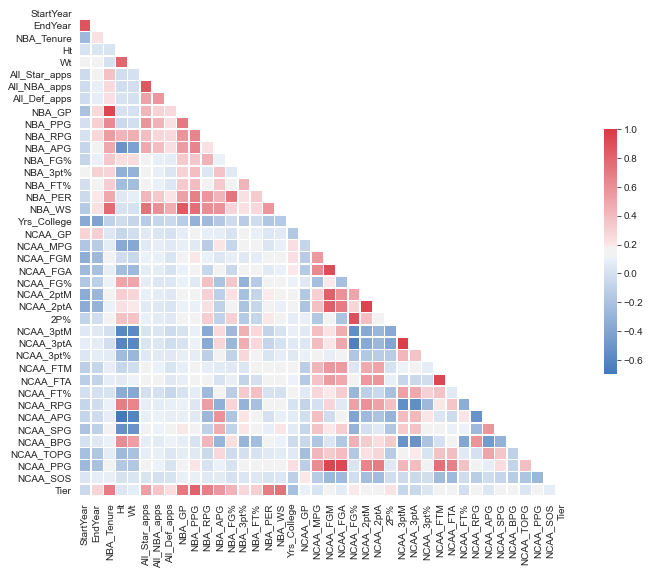

In [49]:
#check correlation matrix
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(13, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

In [50]:
df['Ht'].groupby(df['Position']).describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
C,68.00,83.40,1.51,81.10,81.89,83.86,83.86,90.16
CF,22.00,82.96,1.04,81.10,82.19,83.07,83.07,85.04
F,330.00,80.19,1.32,77.17,79.13,79.92,81.10,83.07
FC,65.00,81.74,1.14,79.13,81.10,81.89,83.07,83.86
FG,38.00,79.25,1.13,77.17,78.25,79.13,79.92,81.89
G,410.00,74.94,2.24,62.99,73.13,74.80,77.17,79.92
GF,80.00,78.11,1.07,74.80,77.17,77.95,79.13,81.10


In [51]:
#Create the column for undersized players
# create a list of our conditions
conditions = [
    (df['Ht'] < 74) & (df['Position'] == 'G'),
    (df['Ht'] < 77) & (df['Position'] == 'GF'),
    (df['Ht'] < 78) & (df['Position'] == 'FG'),
    (df['Ht'] < 79) & (df['Position'] == 'F'),
    (df['Ht'] < 81) & (df['Position'] == 'FC'),
    (df['Ht'] < 82) & (df['Position'] == 'CF'),
    (df['Ht'] < 82) & (df['Position'] == 'C'),
    (df['Ht'] >= 74) & (df['Position'] == 'G'),
    (df['Ht'] >= 77) & (df['Position'] == 'GF'),
    (df['Ht'] >= 78) & (df['Position'] == 'FG'),
    (df['Ht'] >= 79) & (df['Position'] == 'F'),
    (df['Ht'] >= 81) & (df['Position'] == 'FC'),
    (df['Ht'] >= 82) & (df['Position'] == 'CF'),
    (df['Ht'] >= 82) & (df['Position'] == 'C')
    ]

# create a list of the values we want to assign for each condition
values = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Undersized'] = np.select(conditions, values)

# display updated DataFrame
df.head(25)

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier,Undersized
574,Jamal Crawford,"2,001.00","2,020.00",G,20.00,77.17,182.98,1980-03-20,0.00,0.00,0.00,"1,327.00",14.60,2.20,3.40,41.00,34.80,86.20,15.10,60.70,1.00,Michigan,Big Ten,17.00,33.90,6.20,15.00,0.41,4.20,9.10,0.47,1.90,5.90,0.33,2.40,3.00,0.78,2.80,4.50,1.10,0.90,3.10,16.60,9.27,2,0
1484,Jason Kidd,"1,995.00","2,013.00",G,19.00,75.98,202.83,1973-03-23,10.00,6.00,9.00,"1,391.00",12.60,6.30,8.70,40.00,34.90,78.50,17.90,138.60,2.00,California,Pac-10,30.00,35.10,5.50,11.70,0.47,3.80,7.00,0.55,1.70,4.70,0.36,3.90,5.60,0.69,6.90,9.10,3.10,0.30,4.30,16.70,7.14,3,0
1239,Juwan Howard,"1,995.00","2,013.00",F,19.00,81.10,238.10,1973-02-07,1.00,0.00,0.00,"1,208.00",13.40,6.10,2.20,46.90,12.00,76.40,14.60,59.40,3.00,Michigan,Big Ten,30.00,34.00,8.70,15.60,0.56,8.70,15.40,0.56,0.00,0.20,0.14,3.40,5.00,0.68,8.90,2.40,1.50,0.70,2.60,20.80,12.04,2,0
1190,Grant Hill,"1,995.00","2,013.00",FG,19.00,79.92,224.87,1972-10-05,7.00,5.00,0.00,"1,026.00",16.70,6.00,4.10,48.30,31.40,76.90,19.00,99.90,4.00,Duke,ACC,34.00,35.70,6.40,13.90,0.46,5.30,10.90,0.48,1.10,2.90,0.39,3.40,4.90,0.70,6.90,5.20,1.90,1.20,3.00,17.40,8.92,3,0
2125,Paul Pierce,"1,999.00","2,017.00",FG,19.00,79.13,233.69,1977-10-13,10.00,4.00,0.00,"1,343.00",19.70,5.60,3.50,44.50,36.80,80.60,19.70,150.00,3.00,Kansas,Big 12,38.00,30.40,7.60,14.70,0.51,6.50,11.60,0.56,1.10,3.10,0.34,4.30,5.80,0.74,6.70,2.60,1.10,1.10,2.90,20.40,6.54,3,0
738,Tim Duncan,"1,998.00","2,016.00",FC,19.00,83.07,249.12,1976-04-25,15.00,15.00,15.00,"1,392.00",19.00,10.80,3.00,50.60,17.90,69.60,24.20,206.40,4.00,Wake Forest,ACC,31.00,36.70,7.50,12.40,0.61,7.40,11.70,0.63,0.20,0.70,0.27,5.50,8.70,0.64,14.70,3.20,0.70,3.30,3.20,20.80,10.53,3,0
2619,Jason Terry,"2,000.00","2,018.00",G,19.00,74.02,182.98,1977-09-15,0.00,0.00,0.00,"1,410.00",13.40,2.30,3.80,44.40,38.00,84.50,16.20,102.00,4.00,Arizona,Pac-10,29.00,38.20,7.20,16.30,0.44,4.60,9.70,0.47,2.60,6.60,0.40,4.90,5.80,0.84,3.30,5.50,2.80,0.20,4.10,21.90,8.31,2,0
1948,Steve Nash,"1,997.00","2,014.00",G,18.00,74.80,194.01,1974-02-07,8.00,7.00,0.00,"1,217.00",14.30,3.00,8.50,49.00,42.80,90.40,20.00,129.70,4.00,Santa Clara,WCC,29.00,33.80,5.70,13.10,0.43,3.50,6.80,0.51,2.20,6.30,0.34,3.50,3.90,0.89,3.60,6.00,1.30,0.00,3.60,17.00,4.09,3,0
1837,Reggie Miller,"1,988.00","2,005.00",GF,18.00,79.13,182.98,1965-08-24,5.00,3.00,0.00,"1,389.00",18.20,3.00,3.00,47.10,39.50,88.80,18.40,174.40,4.00,UCLA,Pac-10,32.00,36.40,7.70,14.20,0.54,5.60,9.30,0.60,2.20,4.90,0.44,4.70,5.60,0.83,5.40,2.20,2.00,0.20,1.90,22.30,6.89,3,0
848,Derek Fisher,"1,997.00","2,014.00",G,18.00,72.83,198.42,1974-08-09,0.00,0.00,0.00,"1,287.00",8.30,2.10,3.00,39.90,37.40,81.70,11.70,62.30,4.00,Little Rock,Sun Belt,30.00,36.00,4.30,10.40,0.41,2.60,6.10,0.43,1.70,4.30,0.39,4.20,5.60,0.75,5.20,5.10,1.90,0.10,2.70,14.50,-1.03,1,1


In [52]:
df['Tier'].value_counts()

1    375
0    304
2    254
3     80
Name: Tier, dtype: int64

In [53]:
df['Tier_Cat'] = df.Tier.map(lambda x: "All-Star" if x==3 else "Starter" if x==2 else "Role Player" if x==1 else "Bust")

In [54]:
df.head()

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier,Undersized,Tier_Cat
574,Jamal Crawford,"2,001.00","2,020.00",G,20.00,77.17,182.98,1980-03-20,0.00,0.00,0.00,"1,327.00",14.60,2.20,3.40,41.00,34.80,86.20,15.10,60.70,1.00,Michigan,Big Ten,17.00,33.90,6.20,15.00,0.41,4.20,9.10,0.47,1.90,5.90,0.33,2.40,3.00,0.78,2.80,4.50,1.10,0.90,3.10,16.60,9.27,2,0,Starter
1484,Jason Kidd,"1,995.00","2,013.00",G,19.00,75.98,202.83,1973-03-23,10.00,6.00,9.00,"1,391.00",12.60,6.30,8.70,40.00,34.90,78.50,17.90,138.60,2.00,California,Pac-10,30.00,35.10,5.50,11.70,0.47,3.80,7.00,0.55,1.70,4.70,0.36,3.90,5.60,0.69,6.90,9.10,3.10,0.30,4.30,16.70,7.14,3,0,All-Star
1239,Juwan Howard,"1,995.00","2,013.00",F,19.00,81.10,238.10,1973-02-07,1.00,0.00,0.00,"1,208.00",13.40,6.10,2.20,46.90,12.00,76.40,14.60,59.40,3.00,Michigan,Big Ten,30.00,34.00,8.70,15.60,0.56,8.70,15.40,0.56,0.00,0.20,0.14,3.40,5.00,0.68,8.90,2.40,1.50,0.70,2.60,20.80,12.04,2,0,Starter
1190,Grant Hill,"1,995.00","2,013.00",FG,19.00,79.92,224.87,1972-10-05,7.00,5.00,0.00,"1,026.00",16.70,6.00,4.10,48.30,31.40,76.90,19.00,99.90,4.00,Duke,ACC,34.00,35.70,6.40,13.90,0.46,5.30,10.90,0.48,1.10,2.90,0.39,3.40,4.90,0.70,6.90,5.20,1.90,1.20,3.00,17.40,8.92,3,0,All-Star
2125,Paul Pierce,"1,999.00","2,017.00",FG,19.00,79.13,233.69,1977-10-13,10.00,4.00,0.00,"1,343.00",19.70,5.60,3.50,44.50,36.80,80.60,19.70,150.00,3.00,Kansas,Big 12,38.00,30.40,7.60,14.70,0.51,6.50,11.60,0.56,1.10,3.10,0.34,4.30,5.80,0.74,6.70,2.60,1.10,1.10,2.90,20.40,6.54,3,0,All-Star


Text(0.5, 1.0, 'Distribution of Players by Tier')

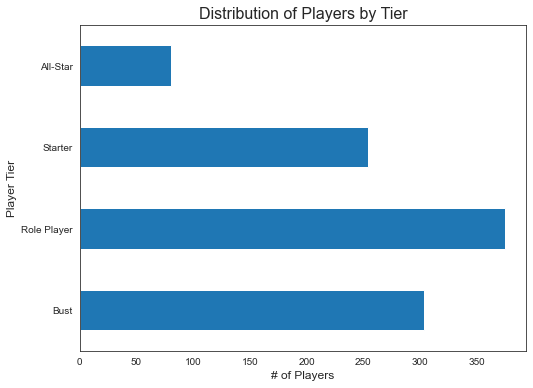

In [55]:
ax = df['Tier_Cat'].value_counts().reindex(["Bust", "Role Player", "Starter", "All-Star"]).plot(kind="barh", figsize=(8,6))
ax.set_xlabel("# of Players", fontsize=12)
ax.set_ylabel("Player Tier", fontsize=12)
ax.set_title("Distribution of Players by Tier", fontsize=16)

In [ ]:
df[df.columns[1:]].corr()['Tier'][:]

In [62]:
df['Conf'].value_counts()

ACC          153
SEC          125
Big Ten      116
Big East     113
Pac-10        97
Big 12        75
WAC           36
Big 8         30
CUSA          29
Pac-12        28
A-10          21
Sun Belt      16
MWC           16
SWC           15
Big West      14
Metro         12
OVC           11
WCC           11
Ind            9
CAA            8
MW Coll        8
MAC            7
MVC            6
MAAC           6
Horizon        5
Southern       5
PCAA           4
GMWC           4
Big Sky        3
SWAC           3
ASC            3
Summit         3
Mid-Cont       2
AAC            2
Ivy            2
Patriot        2
WCAC           2
NEC            2
ECACN          2
NAC            2
ECC            1
ECACM          1
MEAC           1
Southland      1
AEC            1
Name: Conf, dtype: int64

In [63]:
#Create the column for players in Big 5 NCAA Conferences (plus Big East)
# create a list of our conditions
conditions = [
    (df['Conf'] == 'ACC'),
    (df['Conf'] == 'Big East'),
    (df['Conf'] == 'Big Ten'),
    (df['Conf'] == 'Big 12'),
    (df['Conf'] == 'Pac-10'),
    (df['Conf'] == 'SEC')
    ]

# create a list of the values we want to assign for each condition
values = [1, 1, 1, 1, 1, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Conference'] = np.select(conditions, values)

# display updated DataFrame
df.head(25)

,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier,Undersized,Tier_Cat,Conference
574,Jamal Crawford,"2,001.00","2,020.00",G,20.00,77.17,182.98,1980-03-20,0.00,0.00,0.00,"1,327.00",14.60,2.20,3.40,41.00,34.80,86.20,15.10,60.70,1.00,Michigan,Big Ten,17.00,33.90,6.20,15.00,0.41,4.20,9.10,0.47,1.90,5.90,0.33,2.40,3.00,0.78,2.80,4.50,1.10,0.90,3.10,16.60,9.27,2,0,Starter,1
1484,Jason Kidd,"1,995.00","2,013.00",G,19.00,75.98,202.83,1973-03-23,10.00,6.00,9.00,"1,391.00",12.60,6.30,8.70,40.00,34.90,78.50,17.90,138.60,2.00,California,Pac-10,30.00,35.10,5.50,11.70,0.47,3.80,7.00,0.55,1.70,4.70,0.36,3.90,5.60,0.69,6.90,9.10,3.10,0.30,4.30,16.70,7.14,3,0,All-Star,1
1239,Juwan Howard,"1,995.00","2,013.00",F,19.00,81.10,238.10,1973-02-07,1.00,0.00,0.00,"1,208.00",13.40,6.10,2.20,46.90,12.00,76.40,14.60,59.40,3.00,Michigan,Big Ten,30.00,34.00,8.70,15.60,0.56,8.70,15.40,0.56,0.00,0.20,0.14,3.40,5.00,0.68,8.90,2.40,1.50,0.70,2.60,20.80,12.04,2,0,Starter,1
1190,Grant Hill,"1,995.00","2,013.00",FG,19.00,79.92,224.87,1972-10-05,7.00,5.00,0.00,"1,026.00",16.70,6.00,4.10,48.30,31.40,76.90,19.00,99.90,4.00,Duke,ACC,34.00,35.70,6.40,13.90,0.46,5.30,10.90,0.48,1.10,2.90,0.39,3.40,4.90,0.70,6.90,5.20,1.90,1.20,3.00,17.40,8.92,3,0,All-Star,1
2125,Paul Pierce,"1,999.00","2,017.00",FG,19.00,79.13,233.69,1977-10-13,10.00,4.00,0.00,"1,343.00",19.70,5.60,3.50,44.50,36.80,80.60,19.70,150.00,3.00,Kansas,Big 12,38.00,30.40,7.60,14.70,0.51,6.50,11.60,0.56,1.10,3.10,0.34,4.30,5.80,0.74,6.70,2.60,1.10,1.10,2.90,20.40,6.54,3,0,All-Star,1
738,Tim Duncan,"1,998.00","2,016.00",FC,19.00,83.07,249.12,1976-04-25,15.00,15.00,15.00,"1,392.00",19.00,10.80,3.00,50.60,17.90,69.60,24.20,206.40,4.00,Wake Forest,ACC,31.00,36.70,7.50,12.40,0.61,7.40,11.70,0.63,0.20,0.70,0.27,5.50,8.70,0.64,14.70,3.20,0.70,3.30,3.20,20.80,10.53,3,0,All-Star,1
2619,Jason Terry,"2,000.00","2,018.00",G,19.00,74.02,182.98,1977-09-15,0.00,0.00,0.00,"1,410.00",13.40,2.30,3.80,44.40,38.00,84.50,16.20,102.00,4.00,Arizona,Pac-10,29.00,38.20,7.20,16.30,0.44,4.60,9.70,0.47,2.60,6.60,0.40,4.90,5.80,0.84,3.30,5.50,2.80,0.20,4.10,21.90,8.31,2,0,Starter,1
1948,Steve Nash,"1,997.00","2,014.00",G,18.00,74.80,194.01,1974-02-07,8.00,7.00,0.00,"1,217.00",14.30,3.00,8.50,49.00,42.80,90.40,20.00,129.70,4.00,Santa Clara,WCC,29.00,33.80,5.70,13.10,0.43,3.50,6.80,0.51,2.20,6.30,0.34,3.50,3.90,0.89,3.60,6.00,1.30,0.00,3.60,17.00,4.09,3,0,All-Star,0
1837,Reggie Miller,"1,988.00","2,005.00",GF,18.00,79.13,182.98,1965-08-24,5.00,3.00,0.00,"1,389.00",18.20,3.00,3.00,47.10,39.50,88.80,18.40,174.40,4.00,UCLA,Pac-10,32.00,36.40,7.70,14.20,0.54,5.60,9.30,0.60,2.20,4.90,0.44,4.70,5.60,0.83,5.40,2.20,2.00,0.20,1.90,22.30,6.89,3,0,All-Star,1
848,Derek Fisher,"1,997.00","2,014.00",G,18.00,72.83,198.42,1974-08-09,0.00,0.00,0.00,"1,287.00",8.30,2.10,3.00,39.90,37.40,81.70,11.70,62.30,4.00,Little Rock,Sun Belt,30.00,36.00,4.30,10.40,0.41,2.60,6.10,0.43,1.70,4.30,0.39,4.20,5.60,0.75,5.20,5.10,1.90,0.10,2.70,14.50,-1.03,1,1,Role Player,0


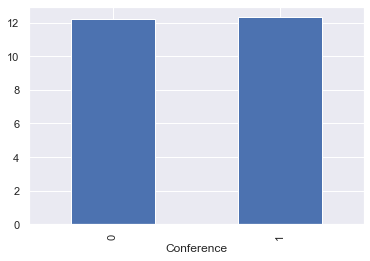

In [79]:
df['NBA_PER'].groupby(df['Conference']).mean().plot(kind='bar')


In [85]:
#Create visualizations to look at difference in means between categories
category_df = df.groupby(df['Tier_Cat']).mean()
category_df

,StartYear,EndYear,NBA_Tenure,Ht,Wt,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier,Undersized,Conference
Tier_Cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
All-Star,"2,001.66","2,013.17",12.51,78.02,215.20,4.55,2.44,1.18,820.14,17.71,5.82,4.28,46.26,32.63,79.17,19.10,81.25,2.58,33.54,32.70,6.58,13.10,0.51,5.37,9.81,0.55,1.22,3.30,0.36,4.17,5.62,0.74,6.99,3.27,1.58,1.04,2.58,18.55,7.27,3.00,0.20,0.78
Bust,"2,003.09","2,004.83",2.74,78.08,211.00,0.00,0.00,0.00,80.98,3.16,1.45,0.79,37.61,19.63,63.40,8.16,0.57,3.44,31.68,32.34,5.90,12.38,0.48,4.65,9.04,0.51,1.25,3.34,0.33,3.63,4.92,0.74,5.97,2.80,1.28,0.73,2.49,16.67,6.07,0.00,0.16,0.62
Role Player,"2,002.30","2,008.95",7.65,78.07,212.45,0.00,0.00,0.03,390.49,6.76,2.78,1.54,43.41,28.43,73.60,11.95,12.45,3.27,32.80,32.48,6.06,12.46,0.49,4.80,9.17,0.52,1.25,3.29,0.34,3.72,4.98,0.75,6.24,2.82,1.35,0.82,2.44,17.08,6.95,1.00,0.19,0.69
Starter,"2,001.88","2,010.91",10.03,78.75,216.47,0.17,0.01,0.16,598.37,10.68,4.43,2.34,46.72,27.81,74.98,15.60,34.31,2.98,32.46,32.43,6.46,12.80,0.51,5.42,10.05,0.54,1.03,2.75,0.33,4.06,5.50,0.74,7.07,2.79,1.40,1.07,2.53,17.99,6.70,2.00,0.19,0.67


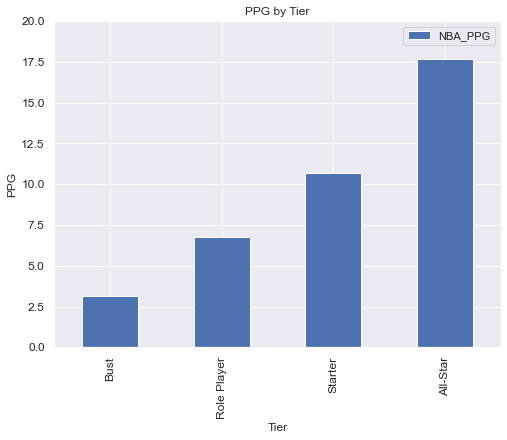

In [100]:
#visualization of ppg by tier category
ax = category_df[['NBA_PPG']].reindex(["Bust", "Role Player", "Starter", "All-Star"]).plot(kind='bar', title ="PPG by Tier", figsize=(8, 6), fontsize=12)
ax.set_xlabel("Tier", fontsize=12)
ax.set_ylabel("PPG", fontsize=12)
ax.set_ylim([0, 20])
plt.show()

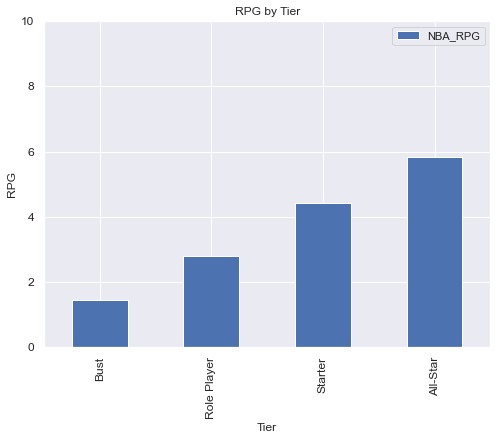

In [103]:
#visualizaiton of rpg by tier category
ax = category_df[['NBA_RPG']].reindex(["Bust", "Role Player", "Starter", "All-Star"]).plot(kind='bar', title ="RPG by Tier", figsize=(8, 6), fontsize=12)
ax.set_xlabel("Tier", fontsize=12)
ax.set_ylabel("RPG", fontsize=12)
ax.set_ylim([0, 10])
plt.show()

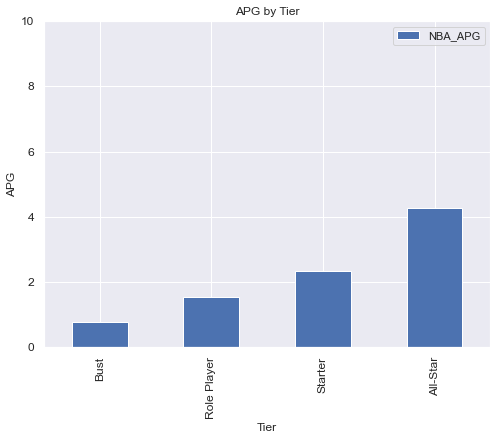

In [104]:
#visualization of apg by tier category
ax = category_df[['NBA_APG']].reindex(["Bust", "Role Player", "Starter", "All-Star"]).plot(kind='bar', title ="APG by Tier", figsize=(8, 6), fontsize=12)
ax.set_xlabel("Tier", fontsize=12)
ax.set_ylabel("APG", fontsize=12)
ax.set_ylim([0, 10])
plt.show()

### Hypothesis Test - Does Players from Big Conferences in College have a higher PER than players from Small Conferences?

In [ ]:
#Hypothesis Test
#Null - PER of players in Big Conference = PER of players in Small Conference
#Alternate - PER of players in Big conference /= PER of players in Small Conference

In [64]:
per_df = df.groupby('Conference').NBA_PER

In [65]:
per_df.describe()

,count,mean,std,min,25%,50%,75%,max
Conference,,,,,,,,
0,334.00,12.20,5.53,-22.10,9.80,12.05,14.60,66.80
1,679.00,12.34,4.57,-18.40,10.20,12.60,14.90,27.40


In [66]:
top = 12.34 - 12.2

In [67]:
bottom = (((12.34 * 12.34)/679) + ((12.2 * 12.2)/334))**.5

In [68]:
t = top/bottom
t

0.1710508493766349

In [72]:
from scipy import stats

In [73]:
t_crit = np.round(stats.t.ppf(1 - .05, df = 1676), 3)
t_crit

1.646

In [ ]:
#Can not reject the null hypothesis

# Modeling

In [ ]:
from scipy.stats.stats import pearsonr
import scipy as sp
from scipy import stats
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn')
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

In [ ]:
#Create new df with just available info when each player was drafted
draft_profile_df = df[['Yrs_College','NCAA_GP', 'NCAA_MPG', 'NCAA_FGM', 'NCAA_FG%', 'NCAA_3ptM', 'NCAA_3pt%',
                       'NCAA_FTM', 'NCAA_FTA', 'NCAA_FT%', 'NCAA_RPG', 'NCAA_APG', 'NCAA_SPG', 'NCAA_BPG',
                       'NCAA_TOPG', 'NCAA_PPG', 'NCAA_SOS', 'Tier', 'Undersized', 'Conference']]

In [ ]:
target = draft_profile_df['Tier']
features = draft_profile_df.drop(['Tier'], axis=1)

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.20)

In [ ]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing dat
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#fumction to find the position of the maximum value in a list
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [ ]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 15))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    
    k_scores.append(acc)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores)
    
print(idx, val)

In [ ]:
#Plot different Ks by accuracy score
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)
knn_preds_train = knn.predict(X_train)

knn_f1 = metrics.f1_score(y_test, knn_preds, average='weighted')
knn_f1_train = metrics.f1_score(y_train, knn_preds_train, average='weighted')

knn_acc = metrics.accuracy_score(y_test, knn_preds)
knn_acc_train = metrics.accuracy_score(y_train, knn_preds_train)


print('Train Accuracy score: ', knn_acc_train)
print('Train F1 score: ', knn_f1_train)
print('Test Accuracy score: ', knn_acc)
print('Test F1 score: ', knn_f1)

### Logistic Regression

In [ ]:
lr = LogisticRegression(class_weight='balanced')

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr_preds = lr.predict(X_test)
lr_preds_train = lr.predict(X_train)

lr_f1 = metrics.f1_score(y_test, lr_preds, average='weighted')
lr_f1_train = metrics.f1_score(y_train, lr_preds_train, average='weighted')

lr_acc = metrics.accuracy_score(y_test, lr_preds)
lr_acc_train = metrics.accuracy_score(y_train, lr_preds_train)

print('Train Accuracy Score: ', lr_acc_train)
print('Train F1 score : ', lr_f1_train)
print('Test Accuracy score: ', lr_acc)
print('Test F1 score: ', lr_f1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(metrics.confusion_matrix(y_test, lr_preds))

In [ ]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_preds)
classes = ['Bust', 'Role Player', 'Starter', 'All-Star']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(X_train, y_train)

clf_preds  = clf.predict(X_test)
clf_preds_train = clf.predict(X_train)

clf_f1 = metrics.f1_score(y_test, clf_preds, average='weighted')
clf_f1_train = metrics.f1_score(y_train, clf_preds_train, average='weighted')

clf_acc = metrics.accuracy_score(y_test, clf_preds)
clf_acc_train = metrics.accuracy_score(y_train, clf_preds_train)

print('Train F1 score: ', clf_f1_train)
print('Train Accuracy score: ', clf_acc_train)
print('Test F1 score: ', clf_f1)
print('Test Accuracy score: ', clf_acc)

In [ ]:
def plot_feature_importances(model):  #wanted to see most important features in the model
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

features, ax = plt.subplots(figsize=(10,11))
sns.barplot( y=X_train.columns.values[-25: ], x=np.sort(clf.feature_importances_)[-25:], orient='h')
ax.set(title='Feature importances to model')
features.savefig('best_features.png', bbox_inches='tight');

### GridsearchCV - Decision Tree

In [ ]:
# Import Grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
# creating our parameters to test
# Parameters dictionary that will loop over a range of 1-20 for 'max_depth', choose between gini and entropy and choose best percent of max features
parameters={'max_depth': range(1,21,1), 
            'criterion': ['entropy', 'gini'], 
            'max_features': [0.25, 0.5, 0.75],
           'min_samples_split': [0.25, 0.5, 0.75],
           'min_samples_leaf': [1, 5, 10, 25]}

In [ ]:
#create our estimaor
dtc = DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(dtc, parameters, cv=5, scoring='f1_weighted',n_jobs=-1,verbose=1)

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', max_features=.75, min_samples_leaf=5, min_samples_split=.25)
clf.fit(X_train, y_train)

clf_preds  = clf.predict(X_test)
clf_preds_train = clf.predict(X_train)

clf_f1 = metrics.f1_score(y_test, clf_preds, average='weighted')
clf_f1_train = metrics.f1_score(y_train, clf_preds_train, average='weighted')

clf_acc = metrics.accuracy_score(y_test, clf_preds)
clf_acc_train = metrics.accuracy_score(y_train, clf_preds_train)

print('Train F1 score: ', clf_f1_train)
print('Train Accuracy score: ', clf_acc_train)
print('Test F1 score: ', clf_f1)
print('Test Accuracy score: ', clf_acc)

In [ ]:
def plot_feature_importances(model):  #wanted to see most important features in the model
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

features, ax = plt.subplots(figsize=(10,11))
sns.barplot( y=X_train.columns.values[-25: ], x=np.sort(clf.feature_importances_)[-25:], orient='h')
ax.set(title='Feature importances to model')
features.savefig('best_features.png', bbox_inches='tight');

### Random Forest

In [ ]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state = 1, class_weight='balanced')

rfc.fit(X_train, y_train)

rfc_preds  = rfc.predict(X_test)
rfc_preds_train = rfc.predict(X_train)

rfc_f1 = metrics.f1_score(y_test, rfc_preds, average='weighted')
rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train, average='weighted')

rfc_acc = metrics.accuracy_score(y_test, rfc_preds)
rfc_acc_train = metrics.accuracy_score(y_train, rfc_preds_train)

print('Train F1 score: ', rfc_f1_train)
print('Train Accuracy score: ', rfc_acc_train)
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr), ('decisiontree', clf)], 
                voting='soft')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)
vc_preds_train = voting_clf.predict(X_train)

vc_f1 = metrics.f1_score(y_test, vc_preds, average='weighted')
vc_f1_train = metrics.f1_score(y_train, vc_preds_train, average='weighted')

vc_acc = metrics.accuracy_score(y_test, vc_preds)
vc_acc_train = metrics.accuracy_score(y_train, vc_preds_train)

print('Train F1 score: ', vc_f1_train)
print('Train Accuracy score: ', vc_acc_train)
print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

### XGBoost

In [ ]:
#conda install -c anaconda py-xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
features = draft_profile_df['Tier']
target = draft_profile_df.drop(columns='Tier')

scaler = StandardScaler()
scaled_df = scaler.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, features)

In [ ]:
parameters = {
    "learning_rate": [0.1, 0.05],
    'max_depth': [5, 10, 15],
    'min_child_weight': [5, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100,200,300,400]}

In [ ]:
clf = xgb.XGBClassifier()
grid_clf = GridSearchCV(clf, parameters, scoring='f1_weighted', cv=5, n_jobs=-1,verbose=1)
grid_clf.fit(scaled_df, features)
best_parameters = grid_clf.best_params_
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
#training_preds = grid_clf.predict(X_train)
#val_preds = grid_clf.predict(X_test)
#training_accuracy = accuracy_score(y_train, training_preds)
#val_accuracy = accuracy_score(y_test, val_preds)
#f1_train= f1_score(y_train, training_preds, average='weighted')
#f1_val= f1_score(y_test, val_preds, average='weighted')
#print("")
#print("Training Accuracy Score: {:.4}%".format(training_accuracy * 100))
#print("Training F1 Score: {:.4}%".format(f1_train * 100))
#print("Test Accuracy Score: {:.4}%".format(val_accuracy * 100))
#print("Test F1 Score: {:.4}%".format(f1_val * 100))

In [ ]:
xgb_preds_train = grid_clf.predict(X_train)
xgb_preds = grid_clf.predict(X_test)

xgb_acc_train = accuracy_score(y_train, xgb_preds_train)
xgb_acc = accuracy_score(y_test, xgb_preds)

xgb_f1_train= f1_score(y_train, xgb_preds_train, average='weighted')
xgb_f1 = f1_score(y_test, xgb_preds, average='weighted')

print("Training F1 Score:", xgb_f1_train)
print("Training Accuracy Score:", xgb_acc_train)
print("Test F1 Score:", xgb_f1)
print("Test Accuracy Score:", xgb_acc)

In [ ]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,xgb_preds)
classes = ['Bust', 'Role Player', 'Starter', 'All-Star']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
grid_clf.best_estimator_.feature_importances_

In [ ]:
#feature_names = ['Yrs_College','NCAA_GP', 'NCAA_MPG', 'NCAA_FGM', 'NCAA_FG%', 'NCAA_3ptM', 'NCAA_3pt%',
#                       'NCAA_FTM', 'NCAA_FTA', 'NCAA_FT%', 'NCAA_RPG', 'NCAA_APG', 'NCAA_SPG', 'NCAA_BPG',
#                       'NCAA_TOPG', 'NCAA_PPG', 'NCAA_SOS', 'Tier', 'Undersized', 'Conference']

# Testing Model on 2019 Draft Class

In [ ]:
df_2019_rookies.head()

In [ ]:
df_2019_rookies.shape

In [ ]:
#remove 'cm' and 'kg' from Ht and Wt columns. Convert ht and wt to inches and lbs respectively
df_2019_rookies['Ht'] = df_2019_rookies['Ht'].map(lambda x: x.rstrip('cm'))
df_2019_rookies['Wt'] = df_2019_rookies['Wt'].map(lambda x: x.rstrip('kg'))
df_2019_rookies['Ht'] = df_2019_rookies['Ht'].astype(int)
df_2019_rookies['Wt'] = df_2019_rookies['Wt'].astype(float)
df_2019_rookies['Ht'] = df_2019_rookies['Ht'] * 0.393701
df_2019_rookies['Wt'] = df_2019_rookies['Wt'] * 2.20462

In [ ]:
#Create the column for undersized players
# create a list of our conditions
conditions = [
    (df_2019_rookies['Ht'] < 74) & (df_2019_rookies['Position'] == 'G'),
    (df_2019_rookies['Ht'] < 77) & (df_2019_rookies['Position'] == 'GF'),
    (df_2019_rookies['Ht'] < 78) & (df_2019_rookies['Position'] == 'FG'),
    (df_2019_rookies['Ht'] < 79) & (df_2019_rookies['Position'] == 'F'),
    (df_2019_rookies['Ht'] < 81) & (df_2019_rookies['Position'] == 'FC'),
    (df_2019_rookies['Ht'] < 82) & (df_2019_rookies['Position'] == 'CF'),
    (df_2019_rookies['Ht'] < 82) & (df_2019_rookies['Position'] == 'C'),
    (df_2019_rookies['Ht'] >= 74) & (df_2019_rookies['Position'] == 'G'),
    (df_2019_rookies['Ht'] >= 77) & (df_2019_rookies['Position'] == 'GF'),
    (df_2019_rookies['Ht'] >= 78) & (df_2019_rookies['Position'] == 'FG'),
    (df_2019_rookies['Ht'] >= 79) & (df_2019_rookies['Position'] == 'F'),
    (df_2019_rookies['Ht'] >= 81) & (df_2019_rookies['Position'] == 'FC'),
    (df_2019_rookies['Ht'] >= 82) & (df_2019_rookies['Position'] == 'CF'),
    (df_2019_rookies['Ht'] >= 82) & (df_2019_rookies['Position'] == 'C')
    ]

# create a list of the values we want to assign for each condition
values = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_2019_rookies['Undersized'] = np.select(conditions, values)

# display updated DataFrame
df_2019_rookies.head(25)

In [ ]:
#Create the column for players in Big 5 NCAA Conferences (plus Big East)
# create a list of our conditions
conditions = [
    (df_2019_rookies['Conf'] == 'ACC'),
    (df_2019_rookies['Conf'] == 'Big East'),
    (df_2019_rookies['Conf'] == 'Big Ten'),
    (df_2019_rookies['Conf'] == 'Big 12'),
    (df_2019_rookies['Conf'] == 'Pac-10'),
    (df_2019_rookies['Conf'] == 'SEC')
    ]

# create a list of the values we want to assign for each condition
values = [1, 1, 1, 1, 1, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df_2019_rookies['Conference'] = np.select(conditions, values)

# display updated DataFrame
df_2019_rookies.head(25)

In [ ]:
#Create new df with just available info when each player was drafted
draft_profile_df = df_2019_rookies[['Yrs_College','NCAA_GP', 'NCAA_MPG', 'NCAA_FGM', 'NCAA_FG%', 'NCAA_3ptM', 'NCAA_3pt%',
                       'NCAA_FTM', 'NCAA_FTA', 'NCAA_FT%', 'NCAA_RPG', 'NCAA_APG', 'NCAA_SPG', 'NCAA_BPG',
                       'NCAA_TOPG', 'NCAA_PPG', 'NCAA_SOS', 'Undersized', 'Conference']]

In [ ]:
draft_profile_df.columns =['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13',
                          'f14', 'f15', 'f16', 'f17', 'f18'] 


In [ ]:
scaled_df = pd.DataFrame(data = scaler.transform(draft_profile_df), columns = draft_profile_df.columns)

In [ ]:
grid_clf.predict(scaled_df)

In [ ]:
df_2019_rookies.head(45)